In [1]:
%matplotlib inline

In [2]:
import numpy as np
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, rc
import matplotlib.pyplot as plt
rc('animation', html='html5')

In [3]:
# trap
rf_freq = 1

def paul_pot(x, y, z, t, **kwargs):
    """ Paul trap electric potential
    """
    alpha = kwargs.get('alpha', 1)
    beta = kwargs.get('beta', 0.1)
    freq = kwargs.get('freq', 1)
    return alpha * np.cos(freq * t) * (x**2.0 - y **2.0) - beta * (x**2.0 + y**2.0 - 2*z**2.0)

# plot range
x_rng = np.linspace(-50, 50)
y_rng = np.linspace(-50, 50)
x_grid, y_grid = np.meshgrid(x_rng, y_rng)

# animation
num_frames = 100
dt = 2*np.pi / (num_frames * rf_freq)

def animate(i):
    t = i * dt
    phi = paul_pot(x_grid, y_grid, 0, t, freq=rf_freq)
    ax.clear() # V. slow. There's probably a better way to do this.
    ax.set_zlim(-2500, 2500)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')
    ax.set_zlabel(r'$\Phi$(r, t)')
    surf = ax.plot_surface(x_grid, y_grid, phi, cmap=cm.viridis, vmin=-2000, vmax=2000)
    return (surf, )

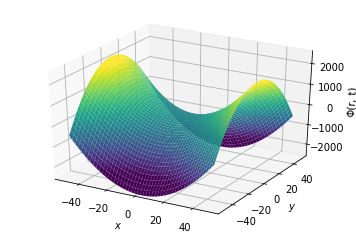

In [4]:
# plot
fig = plt.figure()
ax = fig.gca(projection='3d')
anim = FuncAnimation(fig, animate, frames=num_frames, interval=20);

In [5]:
anim

In [7]:
anim.save('paul_trap.mp4', dpi=150)